In [1]:
%run 'ks25_Read_epistasis.ipynb'

Running notebook 'ks01_Data_import.ipynb'...



/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



Reading precalculated epistasis...
/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/epistasis_in_foursomes/



Variables: 

- ep_dict: a dictionary, Keys are tuples (mutA, mutB) and values are pandas.Series of epistasis between mutA and mutB in all backgrounds. 
Tuples (mutA, mutB) are sorted by aa_position.

- get_ep_summary: a function that takes ep_dict as an argument and applies an arbitrary function to every pd.Series object. For example, ep_summary = get_ep_summary(ep_dict, np.mean)

- get_ep_summary_by_positions: a function that uses get_ep_summary and then averages results by position_pair. For example, get_ep_summary_by_positions(ep_dict, np.max, np.mean) will apply np.max to epistasis series and then use np.mean to average across a position pair. 

Important: natlib_filtering is currently True. This can be changed in the cell #2.



In [2]:
%run 'ks20_Read_ddG.ipynb'


Variables: 
- predicted_ddG:		Pandas DataFrame with all calculated ddG (single, double and triple mutants (?)),
- predicted_doubles:		doubles only (Pandas DataFrame),
- predicted_singles:		singles only (Pandas DataFrame),
- get_ddG:			function that returns predicted ddG for a genotype
- by_position_mean_ddG:		mean ddG value at each position,
- by_position_var_ddG:		variance of predicted ddG at each position.



In [3]:
%run 'ks35_Read_weights.ipynb'


Variables: 

- weights: pandas.DataFrame containing weights of mutations from neural network data (column 'weight') and weights, or fitness potential, of single mutants (column 'mutant_weight')



In [71]:
def get_value_from_ep_summary(ep_summary_dict, mut_comb, log=False):
    try:
        if log:
            return np.log(ep_dict_summary[tuple(mut_comb.split(':'))])
        else:
            return ep_dict_summary[tuple(mut_comb.split(':'))]
    except KeyError:
        return None

def norm_fraction(value, max_fraction, threshold=100):
    return min(255. * value / max_fraction, threshold) * (255./100)
    
all_doubles['mutA'] = all_doubles['mut_list_Scer'].apply(lambda s: s.split(':')[0])
all_doubles['mutB'] = all_doubles['mut_list_Scer'].apply(lambda s: s.split(':')[1])

all_doubles['mutA_ddG'] = all_doubles['mutA'].apply(lambda m: all_singles.loc[m].ddG)
all_doubles['mutB_ddG'] = all_doubles['mutB'].apply(lambda m: all_singles.loc[m].ddG)
all_doubles['ddG_sum_of_singles'] = all_doubles.apply(lambda df: df['mutA_ddG'] + df['mutB_ddG'], axis=1)

all_doubles['ep_fraction_strong'] = all_doubles['mut_list_Scer'].apply(lambda m: get_value_from_ep_summary(ep_dict_summary, m))
max_fraction = max(all_doubles['ep_fraction_strong'])
print max_fraction
all_doubles['ep_fraction_strong_normalized'] = all_doubles['ep_fraction_strong'].apply(lambda v: norm_fraction(v, max_fraction))
all_doubles['segment'] = all_doubles['mutA'].apply(lambda m: position_to_segment[int(m[:-1])])

0.619548081976


In [72]:
def get_mutant_weight(m):
    to_return = weights.loc[m].weight
    if type(to_return) != np.float64:
        return None
    else:
        return to_return

all_doubles['mutA_weight'] = all_doubles['mutA'].apply(lambda m: get_mutant_weight(m))
all_doubles['mutB_weight'] = all_doubles['mutB'].apply(lambda m: get_mutant_weight(m))

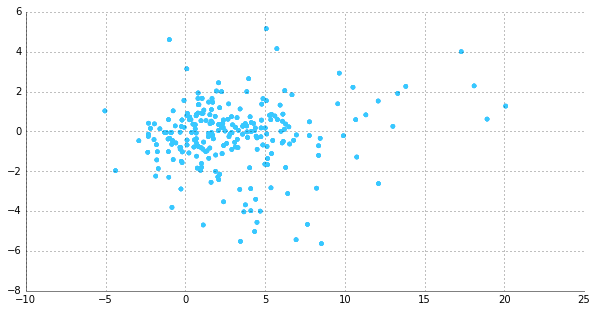

In [73]:
plot_better()

plt.scatter(all_doubles['mutA_ddG'], all_doubles['mutA_weight'], edgecolor='none', alpha=0.3, s=20, 
                color=mpl.cm.cool(int(row[1]['ep_fraction_strong_normalized'])))
plt.scatter(all_doubles['mutB_ddG'], all_doubles['mutB_weight'], edgecolor='none', alpha=0.3, s=20, 
                color=mpl.cm.cool(int(row[1]['ep_fraction_strong_normalized'])))

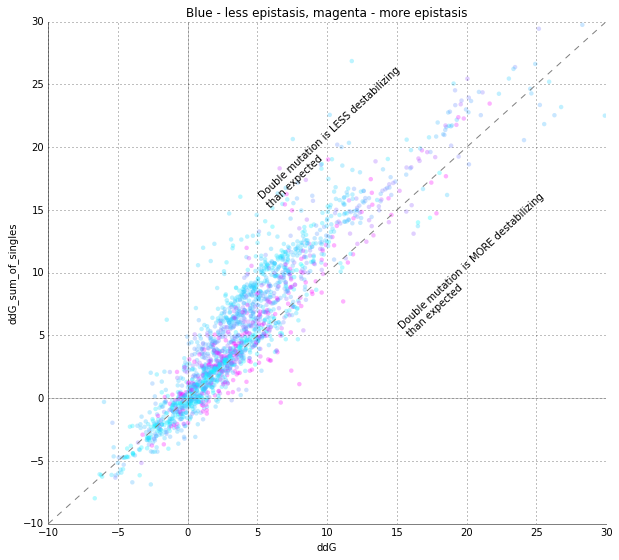

In [12]:
x = 'ddG'
y = 'ddG_sum_of_singles'

plot_better(width=10, height=9)
x_line = np.arange(-10, 30, 0.1)
y_line = [v for v in x_line]
for row in all_doubles.dropna().iterrows():
    plt.scatter(row[1][x], row[1][y], edgecolor='none', alpha=0.3, s=20, 
                color=mpl.cm.cool(int(row[1]['ep_fraction_strong_normalized'])))
#     break
plt.plot(x_line, y_line, color='gray', ls='--')
plt.axhline(0, color='gray', alpha=0.4)
plt.axvline(0, color='gray', alpha=0.4)
plt.xlim(-10,30)
plt.ylim(-10,30)
plt.xlabel(x)
plt.ylabel(y)
# plt.colorbar(mpl.cm.Greens)
plt.text(5, 25, 'Double mutation is LESS destabilizing\nthan expected', rotation=43)
plt.text(15, 15, 'Double mutation is MORE destabilizing\nthan expected', rotation=43)
plt.title('Blue - less epistasis, magenta - more epistasis')

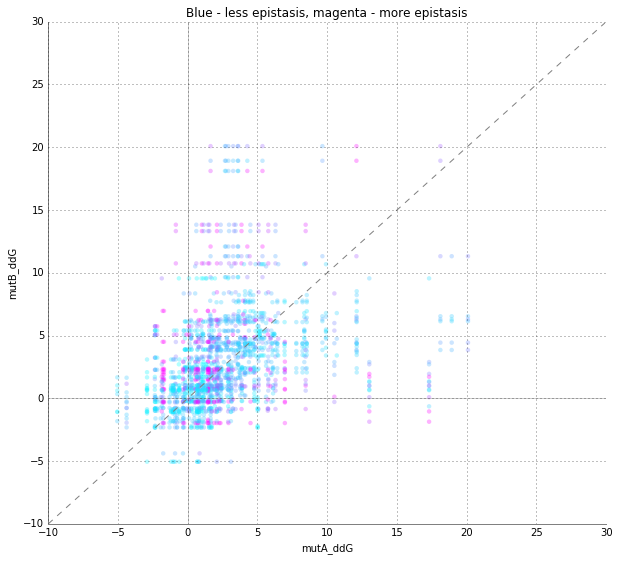

In [13]:
x = 'mutA_ddG'
y = 'mutB_ddG'

plot_better(width=10, height=9)
x_line = np.arange(-10, 30, 0.1)
y_line = [v for v in x_line]
for row in all_doubles.dropna().iterrows():
    plt.scatter(row[1][x], row[1][y], edgecolor='none', alpha=0.3, s=20, 
                color=mpl.cm.cool(int(row[1]['ep_fraction_strong_normalized'])))
#     break
plt.plot(x_line, y_line, color='gray', ls='--')
plt.axhline(0, color='gray', alpha=0.4)
plt.axvline(0, color='gray', alpha=0.4)
plt.xlim(-10,30)
plt.ylim(-10,30)
plt.xlabel(x)
plt.ylabel(y)
plt.title('Blue - less epistasis, magenta - more epistasis')
# plt.colorbar(mpl.cm.Greens)
# plt.text(5, 25, 'Double mutation is LESS destabilizing\nthan expected', rotation=43)
# plt.text(15, 15, 'Double mutation is MORE destabilizing\nthan expected', rotation=43)

In [31]:
weights

,weight,segment
mut_list_Scer,,
106D,0.909814,S1_scaled
106E,-1.538786,S1_scaled
106K,-1.029825,S1_scaled
106N,0.713743,S1_scaled
116R,0.354708,S1_scaled
117F,0.058143,S1_scaled
118G,-0.385277,S1_scaled
119S,0.005796,S1_scaled
120G,0.297664,S1_scaled
